# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
print(env.brain_names)

['TennisBrain']


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [5]:
print(brain)
print(type(brain))

Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 
<class 'unityagents.brain.BrainParameters'>


### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The shape of the state matrix = {}x{}'.format(*states.shape))

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The shape of the state matrix = 2x24


In [7]:
def print_brain_stats(brain) :
    print("Brain name: ", brain.brain_name)
    print("Camera resolutions: ", brain.camera_resolutions)
    print("#Stacked vector observations: ", brain.num_stacked_vector_observations)
    print("#Visual observations: ", brain.number_visual_observations)
    print("Vector action descriptions: ", brain.vector_action_descriptions)
    print("Vector action space size: ", brain.vector_action_space_size)
    print("Vector action space type: ", brain.vector_action_space_type)
    print("Vector observation space size: ", brain.vector_observation_space_size)
    print("Vector observation space type: ", brain.vector_observation_space_type)
    
# test 
print_brain_stats(brain);

Brain name:  TennisBrain
Camera resolutions:  []
#Stacked vector observations:  3
#Visual observations:  0
Vector action descriptions:  ['', '']
Vector action space size:  2
Vector action space type:  continuous
Vector observation space size:  8
Vector observation space type:  continuous


### 3. Train the Agents

In [8]:
# define agent
from ddpg_agent import Agent

states = env_info.vector_observations;
state_size = states.shape[1]; 
action_size = brain.vector_action_space_size;
agent = Agent(state_size=state_size, action_size=action_size, random_seed=72);

Episode 100	Average Score: 0.01
Episode 200	Average Score: 0.01
Episode 300	Average Score: 0.01
Episode 400	Average Score: 0.07
Episode 500	Average Score: 0.22
Episode 600	Average Score: 1.01
Episode 700	Average Score: 0.81
Episode 800	Average Score: 1.20


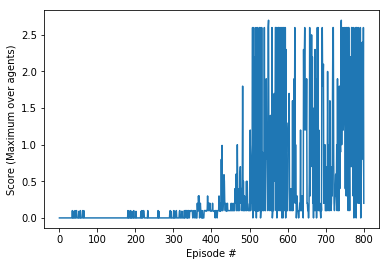

In [9]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

def ddpg(n_episodes=800, max_t=1000, print_every=100, avg_episode=100):
    scores_deque = deque(maxlen=avg_episode)
    scores_mean = []
    count_satisfaction = 0;
    for i_episode in range(1, n_episodes+1):
        scores = np.zeros(num_agents)
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations 
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards 
            if np.any(dones):                                  # exit loop if episode finished
                break
#        print(i_episode, end=" ")
        scores_deque.append(np.max(scores))
        scores_mean.append(np.max(scores))
        if i_episode % avg_episode == 0 : # because not necessary to save models always
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_local.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_local.pth')
            torch.save(agent.actor_target.state_dict(), 'checkpoint_actor_target.pth')
            torch.save(agent.critic_target.state_dict(), 'checkpoint_critic_target.pth')        
            
        if i_episode % print_every == 0:
#            print("");
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))

            
    return scores_mean;

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score (Maximum over agents)')
plt.xlabel('Episode #')
plt.show()

### 4. Test the Agents

In [10]:
import torch
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_local.pth'));
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_local.pth'));

In [11]:
while True :
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    agent.reset()
    while True:
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        states = next_states
        scores += rewards 
        if np.any(dones):                                  # exit loop if episode finished
            break 
    if np.max(scores) > 0.5 :
        break;
        
print('Total score (averaged over agents) this episode: {}'.format(np.max(scores)))

Total score (averaged over agents) this episode: 2.600000038743019


When finished, you can close the environment.

In [12]:
env.close()